<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Chapter-1" data-toc-modified-id="Chapter-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Chapter 1</a></span><ul class="toc-item"><li><span><a href="#Example-1-1" data-toc-modified-id="Example-1-1-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Example 1-1</a></span></li><li><span><a href="#Now-do-it-with-KNN" data-toc-modified-id="Now-do-it-with-KNN-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Now do it with KNN</a></span></li></ul></li><li><span><a href="#Chapter-2" data-toc-modified-id="Chapter-2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Chapter 2</a></span></li></ul></div>

# Chapter 1

## Example 1-1
Training and running a linear model using sklearn

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
# data source
data_root = "https://github.com/ageron/data/raw/main/"

In [3]:
# setting up df
df = pd.read_csv(data_root + 'lifesat/lifesat.csv')
df

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6
5,Portugal,32181.154537,5.4
6,Poland,32238.157259,6.1
7,Estonia,35638.421351,5.7
8,Spain,36215.447591,6.3
9,Slovenia,36547.738956,5.9


In [4]:
# setting variables
X = df[['GDP per capita (USD)']]
y = df['Life satisfaction']

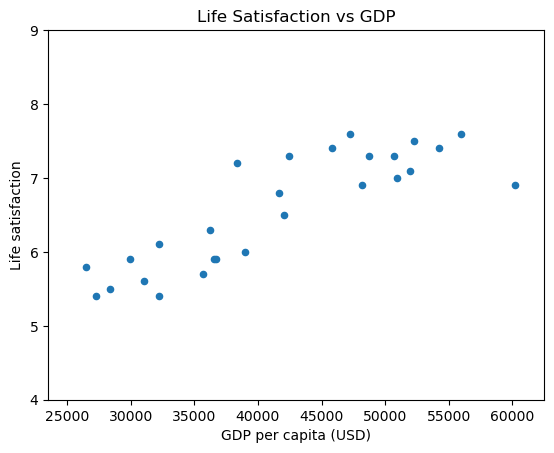

In [5]:
# Visualize data
df.plot(kind='scatter', x='GDP per capita (USD)', y='Life satisfaction')
plt.axis([23500, 62500, 4, 9])
plt.title('Life Satisfaction vs GDP');

In [6]:
# set up model
lr_model = LinearRegression()
lr_model.fit(X, y);

In [7]:
# predicting happiness for Cyprus (GDP of 37,655.2)
X_new = [[37655.2]]
lr_model.predict(X_new)

C:\Users\nacnu\anaconda3\envs\oreilly_tf\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6.30165767])

## Now do it with KNN

In [8]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=3)

In [9]:
# redoing model
knn_model.fit(X, y);
knn_model.predict(X_new)

C:\Users\nacnu\anaconda3\envs\oreilly_tf\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([6.33333333])

# Chapter 2

In [21]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

import matplotlib.pyplot as plt
%matplotlib inline

Creating a function to pull in the dataset if it is not already in the folder.

In [25]:
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

In [26]:
housing = load_housing_data()

In [14]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [15]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Total

In [16]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [17]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


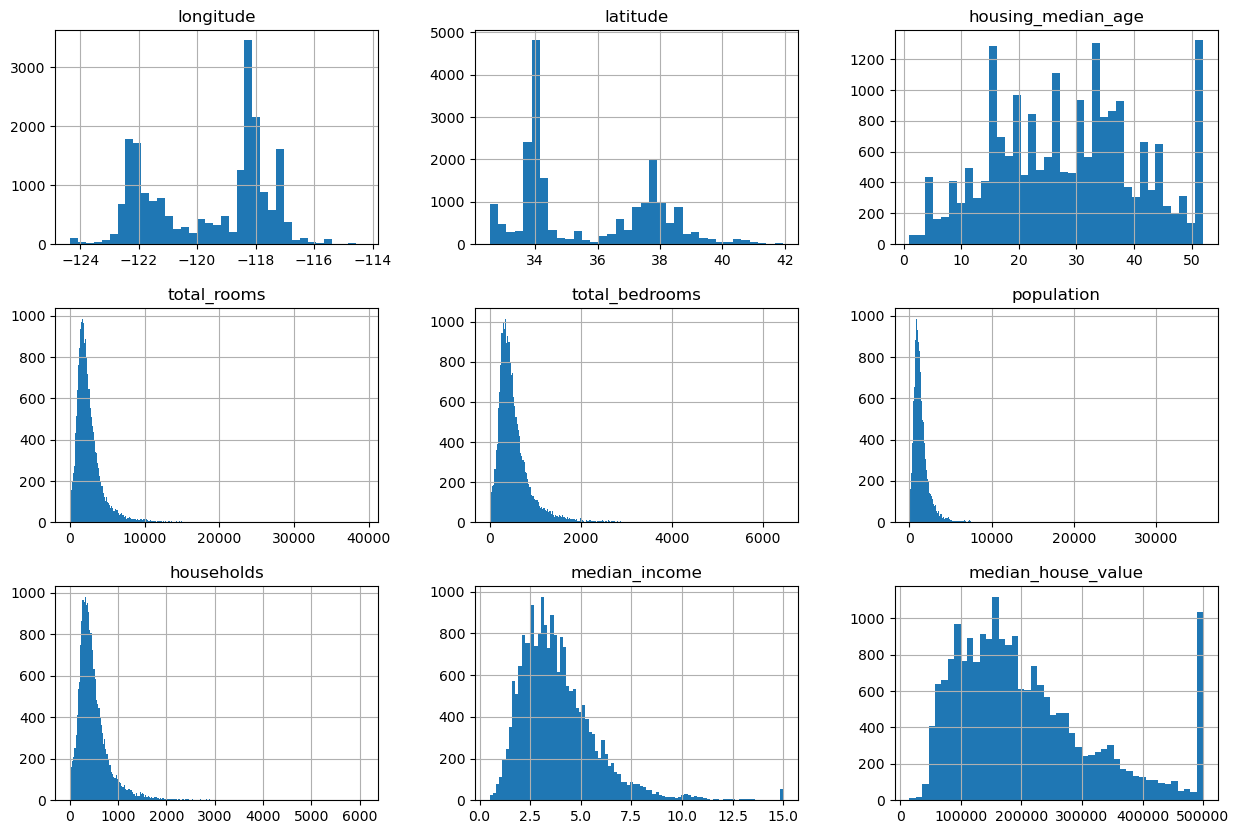

In [24]:
housing.hist(bins='auto', figsize=(15,10));